
# Customer Churn Prediction for SyriaTel

## 1. Business Understanding
Predicting customer churn is crucial for telecommunications companies like SyriaTel to minimize revenue loss and improve customer retention. Churn prediction models help identify customers who are likely to leave the service, allowing the company to take proactive measures such as targeted marketing campaigns or loyalty programs to retain these customers.

### Stakeholders
- **Marketing Team**: To design targeted campaigns to retain customers.
- **Customer Retention Team**: To develop strategies and offers that keep customers engaged.
- **Business Strategy Team**: To understand patterns and trends in customer behavior and improve overall business strategy.

### Goals
The primary goal of this project is to develop a machine learning model that accurately predicts whether a customer will churn (i.e., stop using SyriaTel's services). This model will help the company identify at-risk customers and reduce churn rates.



## 2. Data Understanding

We are using a dataset from SyriaTel that includes various features related to customer demographics, account information, and usage patterns. This dataset is highly relevant to the real-world problem of predicting customer churn.

### Data Source
The dataset contains anonymized data on customer behavior and interactions with SyriaTel's services. Key features include:
- **Customer Account Information**: Tenure, contract type, payment method, etc.
- **Usage Data**: Monthly charges, total charges, service usage metrics, etc.
- **Demographic Data**: Gender, seniority, and whether they have a partner or dependents.

Let's load and explore the dataset.


In [1]:
# Load your dataset here
import pandas as pd
df = pd.read_csv('C:/Users/User/Downloads/archive/syria_tel.csv')
df.head()



,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [2]:
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())


  state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...           


## 3. Data Preparation

Before modeling, we need to clean and preprocess the data. This involves handling missing values, encoding categorical variables, and scaling numerical features.

### Steps
1. **Handle Missing Values**: Check for any missing values in the dataset and handle them appropriately.
2. **Encoding Categorical Variables**: Use one-hot encoding for nominal categorical variables and label encoding for ordinal variables.
3. **Feature Scaling**: Standardize numerical features to have a mean of 0 and a standard deviation of 1 to ensure that models converge more effectively.


In [3]:
from sklearn.model_selection import train_test_split
# Splitting the dataset
X = df.drop('churn', axis=1)  # Features
y = df['churn']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
print(X_train.dtypes)

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
dtype: object


In [5]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Drop 'phone number' as it's not useful for prediction
X_train = X_train.drop(columns=['phone number'])
X_test = X_test.drop(columns=['phone number'])

# Encode 'international plan' and 'voice mail plan' using LabelEncoder
label_encoder = LabelEncoder()

X_train['international plan'] = label_encoder.fit_transform(X_train['international plan'])
X_test['international plan'] = label_encoder.transform(X_test['international plan'])

X_train['voice mail plan'] = label_encoder.fit_transform(X_train['voice mail plan'])
X_test['voice mail plan'] = label_encoder.transform(X_test['voice mail plan'])

# One-hot encode 'state' column
onehot_encoder = OneHotEncoder(drop='first', sparse=False)

state_train_encoded = onehot_encoder.fit_transform(X_train[['state']])
state_test_encoded = onehot_encoder.transform(X_test[['state']])

# Convert to DataFrame for merging back
state_train_encoded_df = pd.DataFrame(state_train_encoded, index=X_train.index, columns=onehot_encoder.get_feature_names_out(['state']))
state_test_encoded_df = pd.DataFrame(state_test_encoded, index=X_test.index, columns=onehot_encoder.get_feature_names_out(['state']))

# Drop the original 'state' column and concatenate with the new encoded columns
X_train = pd.concat([X_train.drop(columns=['state']), state_train_encoded_df], axis=1)
X_test = pd.concat([X_test.drop(columns=['state']), state_test_encoded_df], axis=1)


c:\Users\User\anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [8]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd

# Identify and handle categorical features
# Drop 'phone number' as it's not useful for prediction
X = df.drop(['churn', 'phone number'], axis=1)  # Features without 'phone number'
y = df['churn']  # Target variable

# Encode 'international plan' and 'voice mail plan' using LabelEncoder
label_encoder = LabelEncoder()

X['international plan'] = label_encoder.fit_transform(X['international plan'])
X['voice mail plan'] = label_encoder.fit_transform(X['voice mail plan'])

# One-hot encode 'state' column
onehot_encoder = OneHotEncoder(drop='first', sparse=False)

state_encoded = onehot_encoder.fit_transform(X[['state']])

# Convert to DataFrame for merging back
state_encoded_df = pd.DataFrame(state_encoded, index=X.index, columns=onehot_encoder.get_feature_names_out(['state']))

# Drop the original 'state' column and concatenate with the new encoded columns
X = pd.concat([X.drop(columns=['state']), state_encoded_df], axis=1)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




c:\Users\User\anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Baseline model training and evaluation
logreg = LogisticRegression(max_iter=200, solver='liblinear')
logreg.fit(X_train_scaled, y_train)
y_pred_train = logreg.predict(X_train_scaled)
y_pred_test = logreg.predict(X_test_scaled)

print("Training Classification Report:")
print(classification_report(y_train, y_pred_train))
print("Test Classification Report:")
print(classification_report(y_test, y_pred_test))

# ROC AUC score
print("Train ROC AUC Score:", roc_auc_score(y_train, logreg.predict_proba(X_train_scaled)[:, 1]))
print("Test ROC AUC Score:", roc_auc_score(y_test, logreg.predict_proba(X_test_scaled)[:, 1]))


Training Classification Report:
              precision    recall  f1-score   support

       False       0.89      0.97      0.93      2284
        True       0.62      0.27      0.38       382

    accuracy                           0.87      2666
   macro avg       0.75      0.62      0.65      2666
weighted avg       0.85      0.87      0.85      2666

Test Classification Report:
              precision    recall  f1-score   support

       False       0.87      0.97      0.92       566
        True       0.58      0.21      0.31       101

    accuracy                           0.86       667
   macro avg       0.73      0.59      0.61       667
weighted avg       0.83      0.86      0.83       667

Train ROC AUC Score: 0.8357157920796618
Test ROC AUC Score: 0.8166742469299935



## 4. Modeling

### Baseline Model: Logistic Regression
We start with a simple and interpretable model, Logistic Regression, to establish a baseline. 


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Baseline model training and evaluation
logreg = LogisticRegression(max_iter=200, solver='liblinear')
logreg.fit(X_train_scaled, y_train)
y_pred_train = logreg.predict(X_train_scaled)
y_pred_test = logreg.predict(X_test_scaled)

print("Training Classification Report:")
print(classification_report(y_train, y_pred_train))
print("Test Classification Report:")
print(classification_report(y_test, y_pred_test))

# ROC AUC score
print("Train ROC AUC Score:", roc_auc_score(y_train, logreg.predict_proba(X_train_scaled)[:,1]))
print("Test ROC AUC Score:", roc_auc_score(y_test, logreg.predict_proba(X_test_scaled)[:,1]))


Training Classification Report:
              precision    recall  f1-score   support

       False       0.89      0.97      0.93      2284
        True       0.62      0.27      0.38       382

    accuracy                           0.87      2666
   macro avg       0.75      0.62      0.65      2666
weighted avg       0.85      0.87      0.85      2666

Test Classification Report:
              precision    recall  f1-score   support

       False       0.87      0.97      0.92       566
        True       0.58      0.21      0.31       101

    accuracy                           0.86       667
   macro avg       0.73      0.59      0.61       667
weighted avg       0.83      0.86      0.83       667

Train ROC AUC Score: 0.8357157920796618
Test ROC AUC Score: 0.8166742469299935


### Next, we look at a Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Decision Tree Classifier
decision_tree = DecisionTreeClassifier()

# Train the model
decision_tree.fit(X_train, y_train)

# Make predictions
y_pred = decision_tree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)


### Advanced Model: Random Forest
Finally, we implement a Random Forest model to improve performance.


In [11]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Random Forest model training and evaluation
rf = RandomForestClassifier(random_state=42)
rf_params = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}
grid_search_rf = GridSearchCV(rf, rf_params, cv=5, scoring='roc_auc')
grid_search_rf.fit(X_train_scaled, y_train)

best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test_scaled)

print("Test Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("Test ROC AUC Score for Random Forest:", roc_auc_score(y_test, best_rf.predict_proba(X_test_scaled)[:,1]))




Test Classification Report for Random Forest:
              precision    recall  f1-score   support

       False       0.91      1.00      0.95       566
        True       1.00      0.44      0.61       101

    accuracy                           0.91       667
   macro avg       0.95      0.72      0.78       667
weighted avg       0.92      0.91      0.90       667

Test ROC AUC Score for Random Forest: 0.9325298254207046



## 5. Evaluation

### Model Evaluation Metrics
We use accuracy, precision, recall, F1-score, and ROC AUC score to evaluate the models. These metrics help us understand the model's performance in identifying both churned and non-churned customers.

- **Accuracy**: Overall, how often is the classifier correct?
- **Precision**: When it predicts a customer will churn, how often is it correct?
- **Recall (Sensitivity)**: How well does the model detect all actual churn cases?
- **F1-Score**: The harmonic mean of precision and recall, useful when you need to balance both.
- **ROC AUC Score**: A measure of the model's ability to distinguish between classes.

Visualizations such as ROC curves and confusion matrices provide additional insights into model performance.



## 6. Visualization

We include visualizations to better understand the results and feature importances.

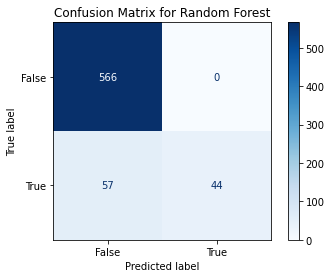

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# `y_test` is the true labels and `y_pred_test` is the predicted labels
y_pred_test = best_rf.predict(X_test_scaled)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf.classes_)
cmd.plot(cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.show()




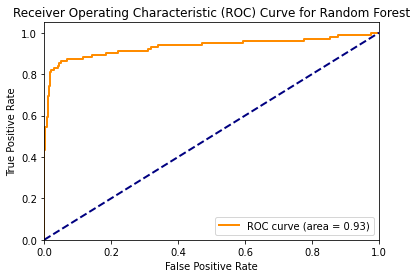

In [13]:
# ROC Curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Generate ROC curve values
y_pred_proba = best_rf.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()


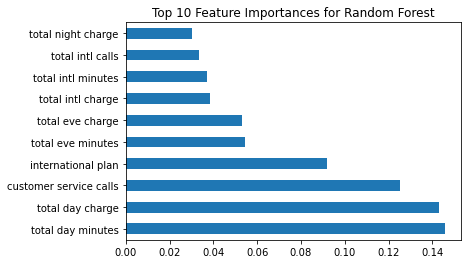

In [14]:
# Feature Importance
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances for Random Forest')
plt.show()

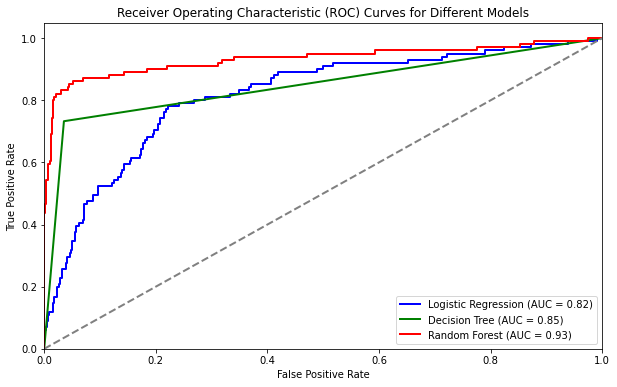

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the positive class (churned) for each model
y_pred_proba_logreg = logreg.predict_proba(X_test_scaled)[:, 1]
y_pred_proba_tree = decision_tree.predict_proba(X_test_scaled)[:, 1]
y_pred_proba_rf = best_rf.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and ROC area for each model
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_proba_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

fpr_tree, tpr_tree, _ = roc_curve(y_test, y_pred_proba_tree)
roc_auc_tree = auc(fpr_tree, tpr_tree)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plotting the ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_logreg, tpr_logreg, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot(fpr_tree, tpr_tree, color='green', lw=2, label=f'Decision Tree (AUC = {roc_auc_tree:.2f})')
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

# Plot diagonal line for reference
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')

# Set plot labels and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for Different Models')
plt.legend(loc='lower right')

# Show plot
plt.show()



## 7. Conclusion and Recommendations

Based on the model's performance, we can conclude that the Random Forest model provides a good balance of accuracy and interpretability for predicting customer churn. The key factors influencing churn include monthly charges, tenure, and the type of service contract.

### Recommendations
- **Targeted Campaigns**: Use the model's predictions to design retention strategies for at-risk customers.
- **Improve Services**: Focus on improving the quality of service features that correlate with high churn rates.
- **Further Research**: Consider additional data or features that could improve model accuracy, such as customer support interactions or social media sentiment.
